In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
import warnings

warnings.filterwarnings('ignore')

In [65]:
data = pd.read_csv('diabetes.csv')
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [66]:
data.shape

(768, 9)

In [67]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see there is no missing data in the columns. Great! --> 
   Glucose, BloodPressure, SkinThickness, Insulin these are all 0 in minimum, but it's not possible.

In [68]:
data['Glucose'] = data['Glucose'].replace(0,np.nan)
data['BloodPressure'] = data['BloodPressure'].replace(0,np.nan)
data['SkinThickness'] = data['SkinThickness'].replace(0,np.nan)
data['Insulin'] = data['Insulin'].replace(0,np.nan)
data['BMI'] = data['BMI'].replace(0,np.nan)

In [69]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [70]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [71]:
# Wherever there are null or missing values in the data, 
   # it will be automatically find and filled by this line of code through the mean method.

for i in data:
    data[i].fillna(data[i].mean(), inplace = True)

In [72]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [73]:
from scipy.stats import zscore
z = np.abs(zscore(data))
data1 = data[(z<3).all(axis = 1)]
data = data1.copy()
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1


In [74]:
data.shape

(719, 9)

In [75]:
X = data.drop(columns = 'Outcome')
y = data['Outcome']

In [76]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)

Scaling part is inbuilt in decision tree.

Scaling not required in decision-tree.

In [78]:
# Let's first visualize the tree on the data without doing any pre processing.
# By default it is using "Gini"

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

 Important Note -->> cross validation means check your algo with 5 iteration or different using algos, then check accuracy if accuracy is similar or nearest then you can say that it is okay.

"score" method shows accuracy on training data and testing data.
 1 means 100% accuracy.

 Big problem in DecisionTree -->> "Overfitting" means we can see there are big difference in score_train and score_test, 
    if difference is big between them, then it is called "Overfitting".

In [79]:
clf.score(X_train, y_train)

1.0

In [80]:
clf.score(X_test, y_test)

0.6833333333333333

In [ ]:
# Now using "Entropy"

In [81]:
clf1 = DecisionTreeClassifier(criterion = 'entropy')
clf1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Note --> "clf" is object of "DecisionTreeClassifier()" 

"score" is the part of Decision Tree, "r2-score" is the part of "Regression", "accuracy-score" is the part of "Classification".

Q1. What is overfitting and underfitting? and how to less and balance?

In [82]:
clf1.score(X_train, y_train)

1.0

In [83]:
clf1.score(X_test, y_test)

0.7055555555555556

In [84]:
clf2 = DecisionTreeClassifier(criterion = "entropy", max_depth = 3) # here "max_depth = 3" means pre pruning means depth of tree only 3, not full explore.
clf2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [86]:
clf2.score(X_train, y_train)

0.7792207792207793

In [87]:
clf2.score(X_test, y_test)

0.6611111111111111

In [88]:
 # Prediction
py_pred = clf.predict(X_test)

In [89]:
from sklearn.metrics import classification_report, confusion_matrix

In [90]:
print(classification_report(y_test, py_pred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       110
           1       0.61      0.51      0.56        70

    accuracy                           0.68       180
   macro avg       0.66      0.65      0.66       180
weighted avg       0.68      0.68      0.68       180



In [91]:
print(classification_report(y_test, clf1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77       110
           1       0.63      0.57      0.60        70

    accuracy                           0.71       180
   macro avg       0.69      0.68      0.68       180
weighted avg       0.70      0.71      0.70       180



In [97]:
print(classification_report(y_test, clf2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.93      0.77       110
           1       0.68      0.24      0.36        70

    accuracy                           0.66       180
   macro avg       0.67      0.59      0.56       180
weighted avg       0.67      0.66      0.61       180



 How to make Decision Tree?

In [93]:
from sklearn import tree

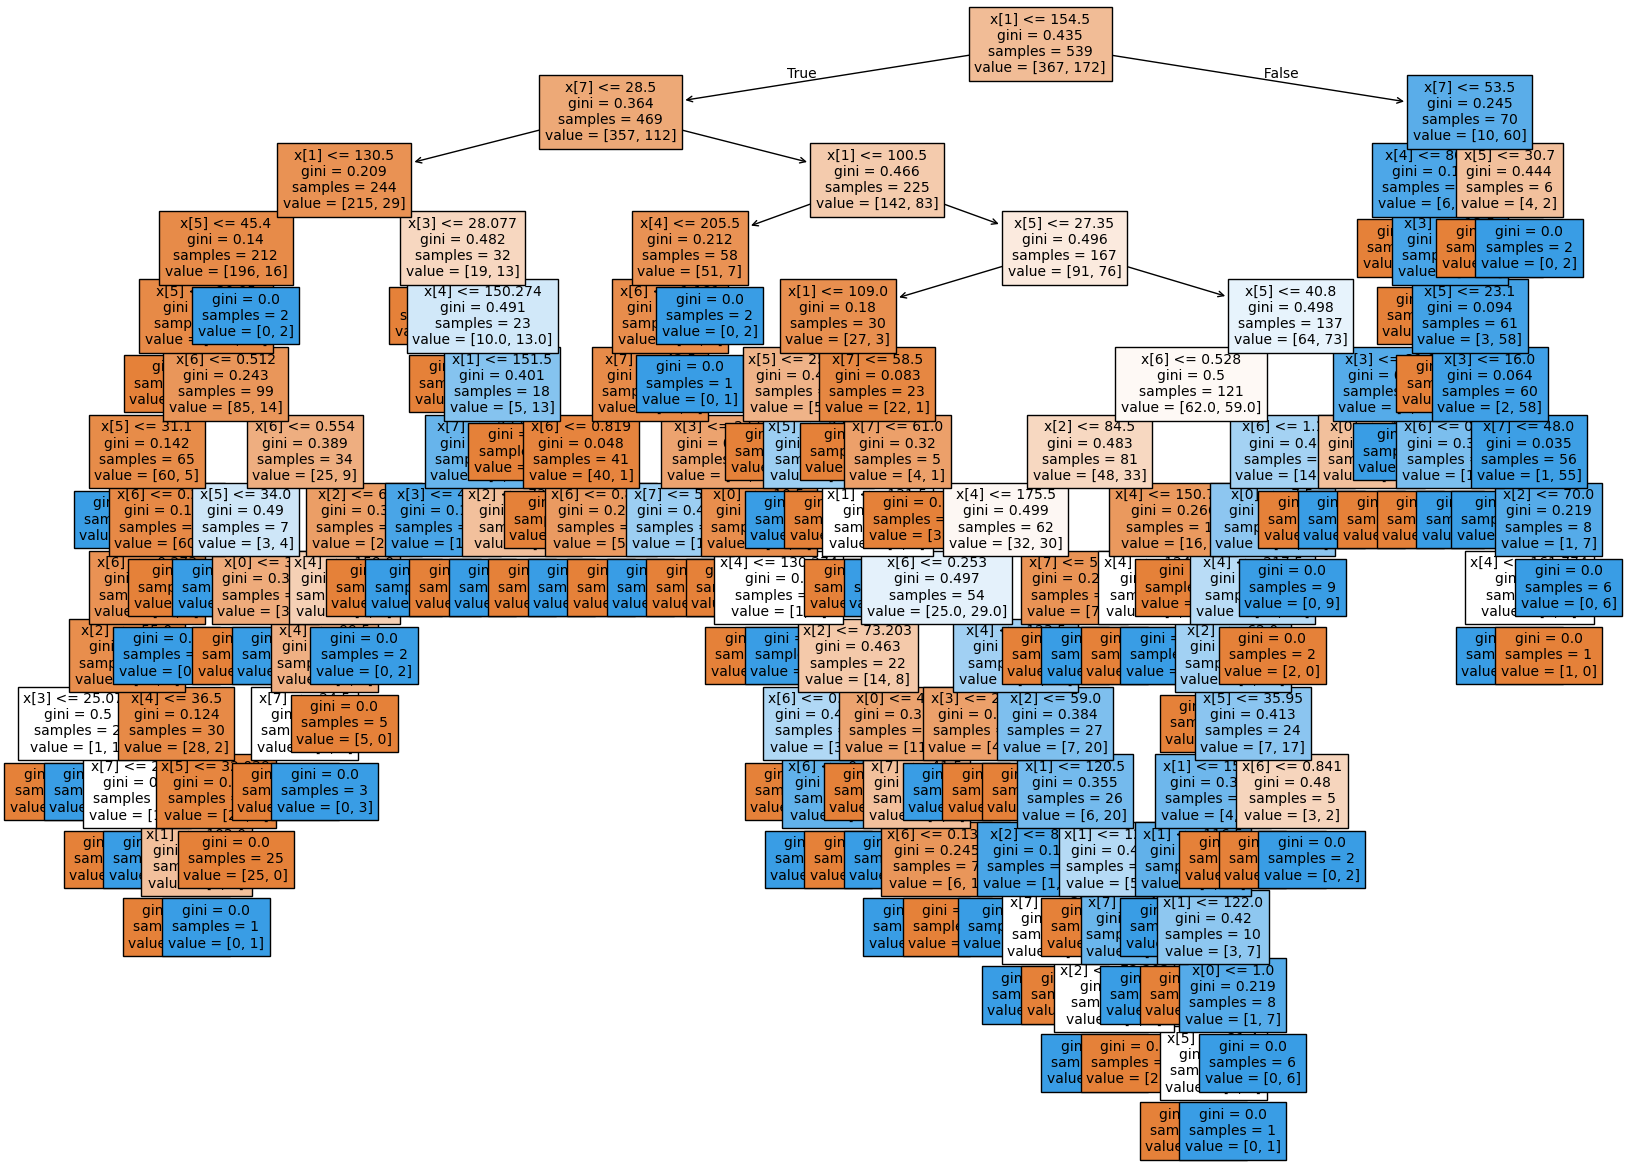

In [94]:
plt.figure(figsize = (20,15))
tree.plot_tree(clf, filled = True, fontsize = 10)
plt.show()

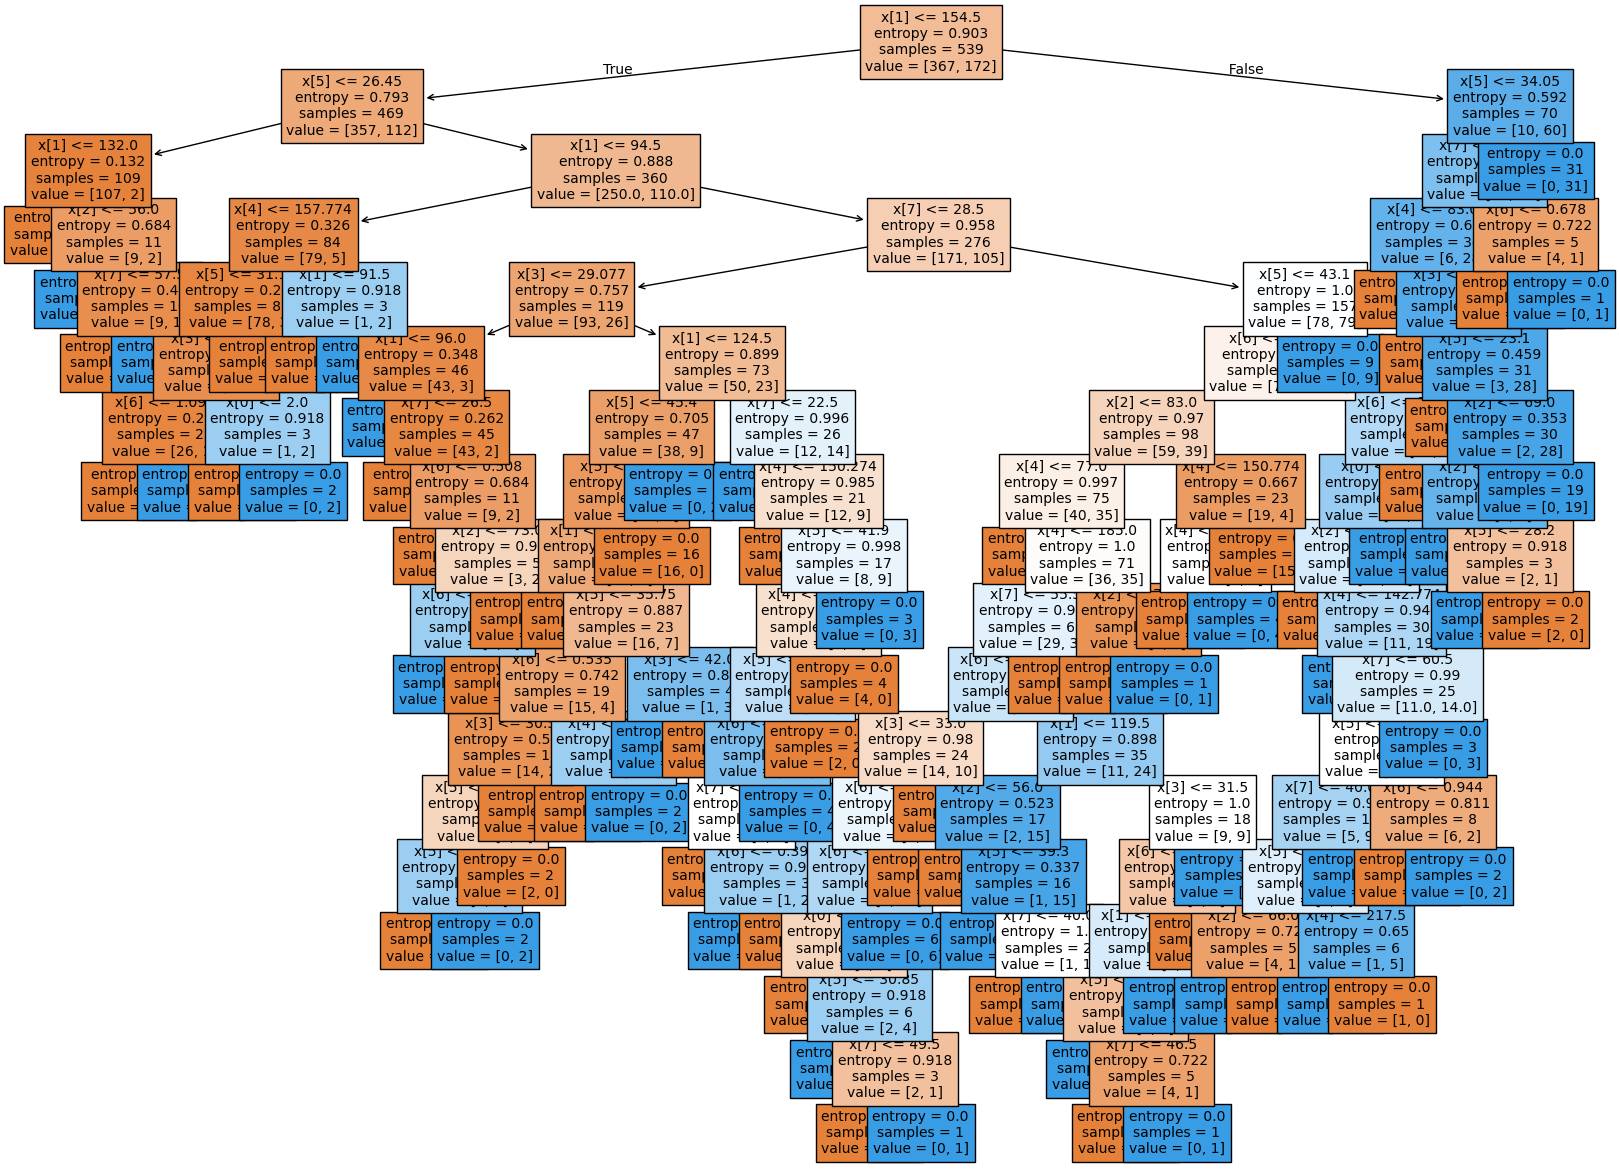

In [95]:
plt.figure(figsize = (20,15))
tree.plot_tree(clf1, filled = True, fontsize = 10)
plt.show()

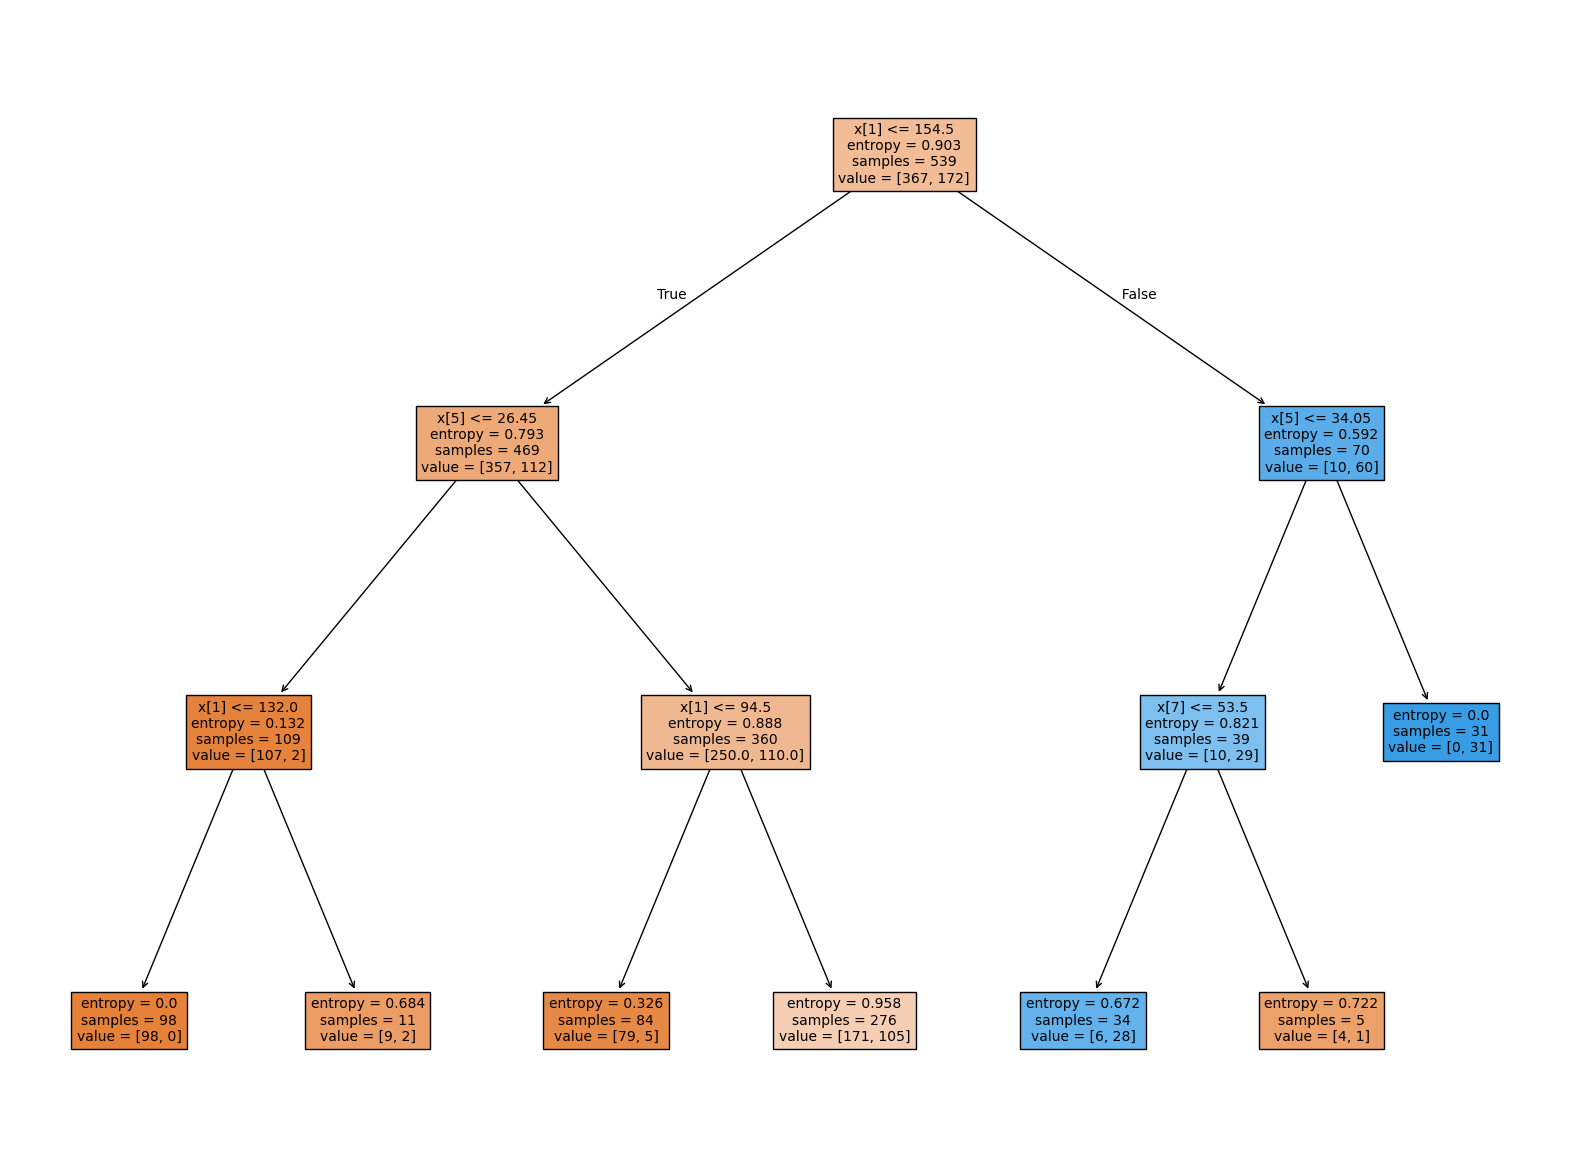

In [96]:
plt.figure(figsize = (20,15))
tree.plot_tree(clf2, filled = True, fontsize = 10)
plt.show()

In [98]:
# Note --> In clf and clf1, here depth is full so in both cases it is overfitting scenerio, but in clf2 here we use limit max_depth = 3 so it is clear tree.

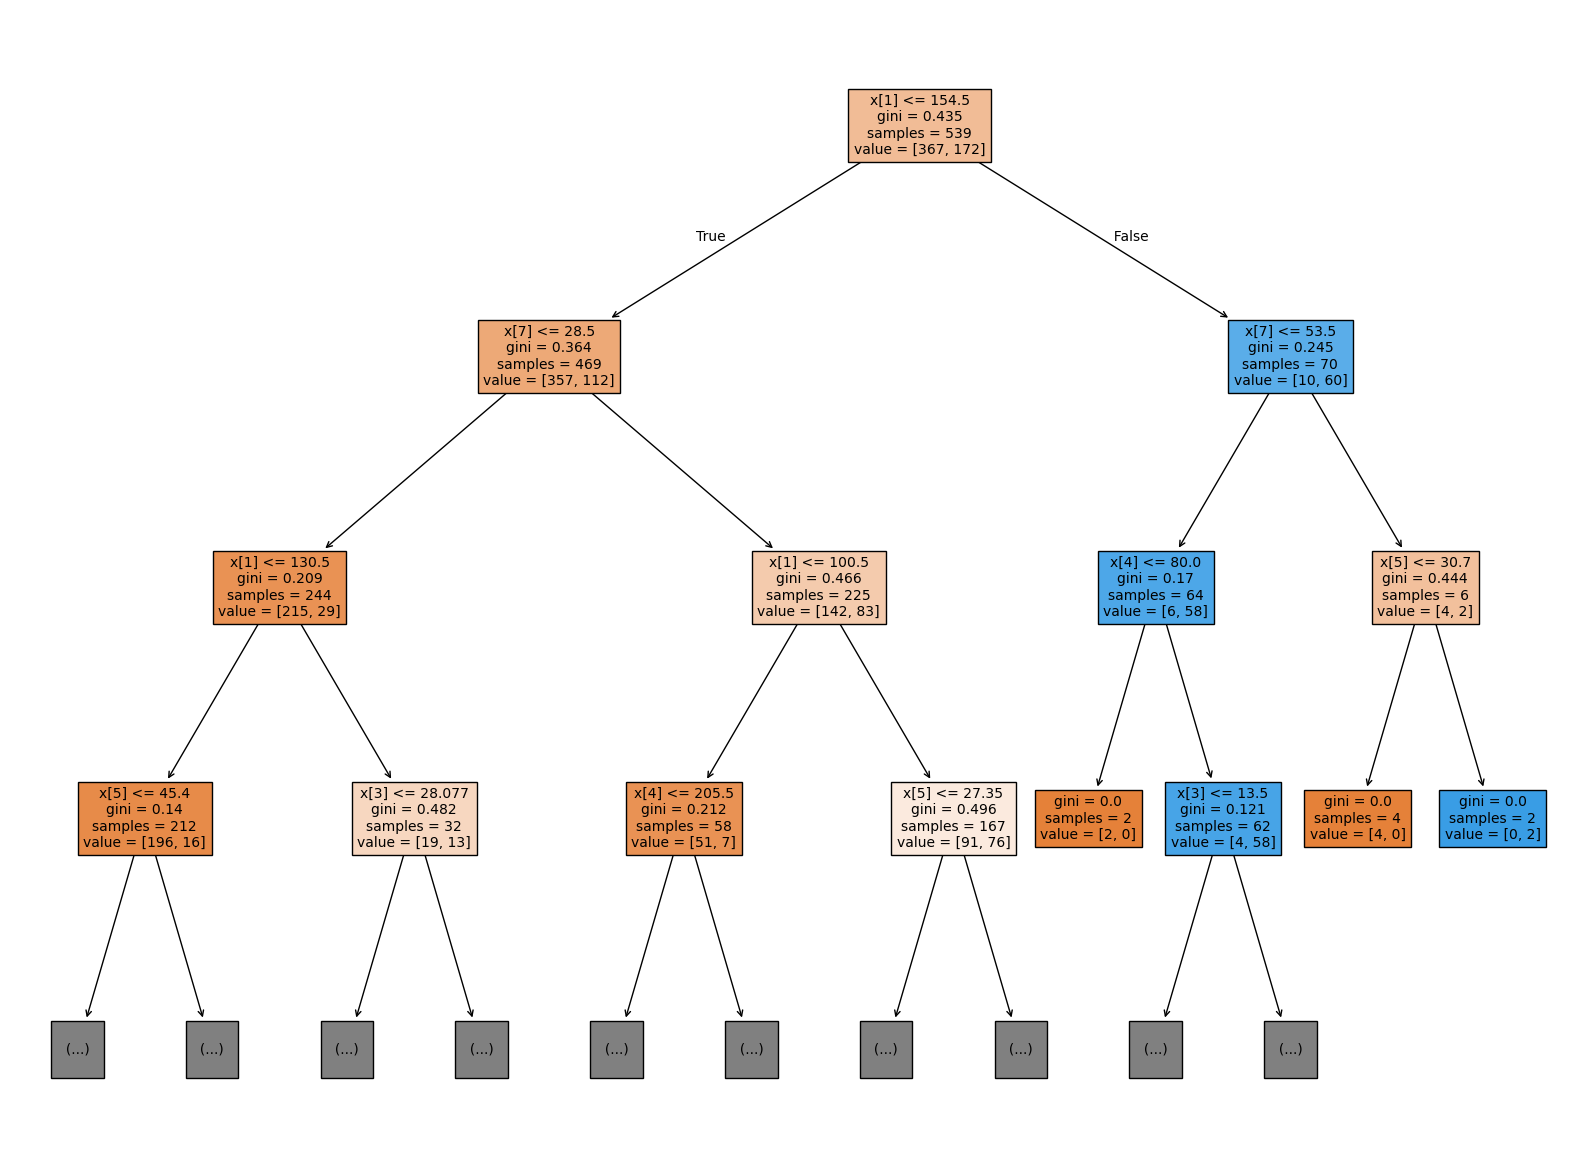

In [99]:
# we can make this tree using max_depth = 3.
plt.figure(figsize = (20,15))
tree.plot_tree(clf, max_depth = 3 ,filled = True, fontsize = 10)
plt.show()

In [ ]:
# Completed..............................